In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VERİ ANALİZİ

In [ ]:
#Verileri Okuma
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [ ]:
#Eksik veri var mı, sayısal/kategorik sütunlar hangileri , dağılımlar nasıl bakmak için :
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  

In [ ]:
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [ ]:
#id kolonu modele verilmez çıkartıyoruz
df = df.drop(columns="id", axis =1)
print(df.head())


   Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0  


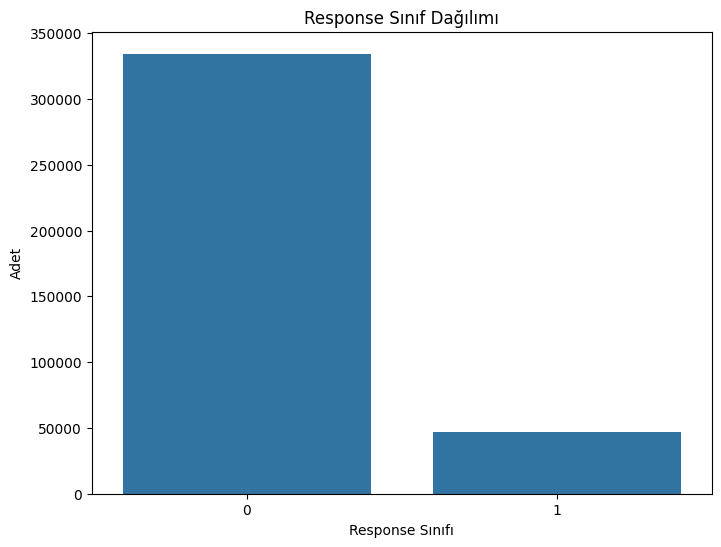

In [ ]:
#Veri setindeki dengesizliği grafikten görelim

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Response')
plt.title('Response Sınıf Dağılımı')
plt.xlabel('Response Sınıfı')
plt.ylabel('Adet')
plt.show()


In [ ]:
response_counts = df['Response'].value_counts()
print(response_counts)

Response
0    334399
1     46710
Name: count, dtype: int64


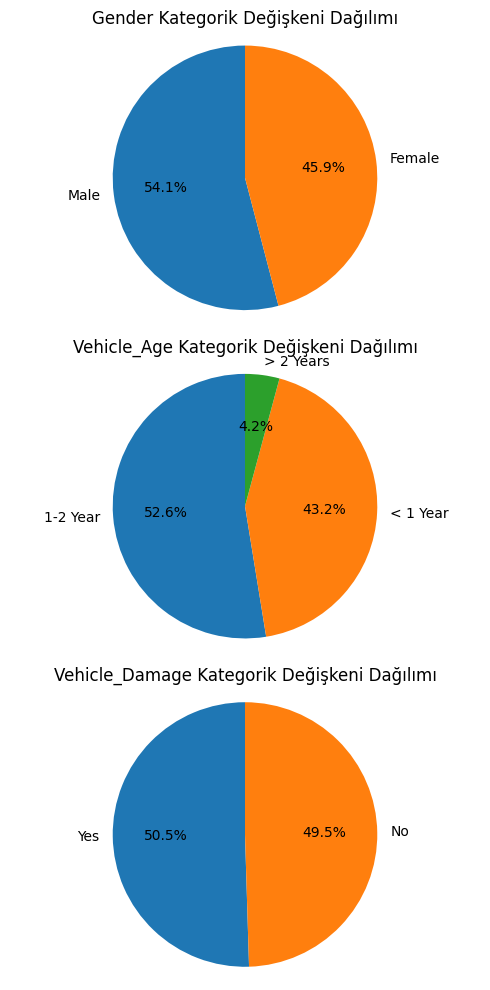

In [ ]:
#Kategorik veriler nasıl dağılmış, kategorik verilerdeki unique değerler neler görmek için pasta grafiği :

import matplotlib.pyplot as plt

categorical_columns = ['Gender','Vehicle_Age', 'Vehicle_Damage']

plt.figure(figsize=(5, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"{column} Kategorik Değişkeni Dağılımı")
    plt.ylabel('')
    plt.axis('equal')

plt.tight_layout()
plt.show()

UÇ DEĞER TESPİTİ

In [ ]:
#df.info()dan görmüştük bu sütunda uç değerler vardı IQR ile tespit edeceğiz
column = 'Annual_Premium'
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"{column} için:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Alt Sınır: {lower_bound}, Üst Sınır: {upper_bound}")


outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"{column} için uç değer sayısı: {len(outliers)}")
print(f"{column} için uç değerler:")
print(outliers[column].unique())


Annual_Premium için:
Q1: 24405.0, Q3: 39400.0, IQR: 14995.0, Alt Sınır: 1912.5, Üst Sınır: 61892.5
Annual_Premium için uç değer sayısı: 10320
Annual_Premium için uç değerler:
[ 61964.  76251.  66338. ...  91305. 101664.  69845.]


LOG İLE UÇ DEĞER DÖNÜŞÜMÜ

In [ ]:
#Log dönüşümü ile uç değerlerin etkisini azaltmaya çalıştık veri silmek istemediğimden yapıyorum bunu
df['Annual_Premium'] = np.log(df['Annual_Premium'])
print(df['Annual_Premium'].head())

0    10.607921
1    10.420375
2    10.553049
3    10.261826
4    10.221796
Name: Annual_Premium, dtype: float64


KATEGORİK VERİLERİN NUMERİK VERİLERE ÇEVRİLMESİ (ENCODİNG İŞLEMLERİ)

In [ ]:
#Kategorik değişkenler numerik değişkenlere çevrilmeli daha anlaşılır bulduğumdan fonksiyon tanımlayarak yaptım Encodinglerle de yapılabilir

import pandas as pd
import numpy as np

def standardize_data(inp_df, mode="train"):
    inp_df["Gender"] = inp_df["Gender"].replace(
        {
            "Male": 1,
            "Female": 0

        }
    )

    inp_df["Vehicle_Age"] = inp_df["Vehicle_Age"].replace(
        {
            '< 1 Year': 0,
            '1-2 Year': 1,
            '> 2 Years': 2
        }
    )

    inp_df["Vehicle_Damage"] = inp_df["Vehicle_Damage"].replace(
        {
            "Yes": 1,
            "No": 0

        }
    )

    return inp_df


df = standardize_data(df, mode="train")


print("Standardize edilen veri setleri:")
print(df.head(3))
print(df.dtypes)



<ipython-input-11-527f6da28c2d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inp_df["Gender"] = inp_df["Gender"].replace(
<ipython-input-11-527f6da28c2d>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inp_df["Vehicle_Age"] = inp_df["Vehicle_Age"].replace(


Standardize edilen veri setleri:
   Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            2   
1       1   76                1          3.0                   0            1   
2       1   47                1         28.0                   0            2   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1       10.607921                  26.0      217         1  
1               0       10.420375                  26.0      183         0  
2               1       10.553049                  26.0       27         1  
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response      

<ipython-input-11-527f6da28c2d>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inp_df["Vehicle_Damage"] = inp_df["Vehicle_Damage"].replace(


MODEL : CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.1 MB/s eta 0:00:00


DENGESİZ VERİ SETLERİ İÇİN OVERSAMPLİNG YÖNTEMLERİNDEN SMOTE

In [ ]:
#Veri setindeki dengesizlik için SMOTE kullanacağım
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.4 MB/s eta 0:00:00


CatBoost

Eğitim seti boyutu (SMOTE sonrası): (668798, 10)
CatBoost - Confusion Matrix:
 [[48038 18737]
 [ 2820 64165]]
CatBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.82     66775
           1       0.77      0.96      0.86     66985

    accuracy                           0.84    133760
   macro avg       0.86      0.84      0.84    133760
weighted avg       0.86      0.84      0.84    133760

ROC-AUC Skoru: 0.9481744210518697


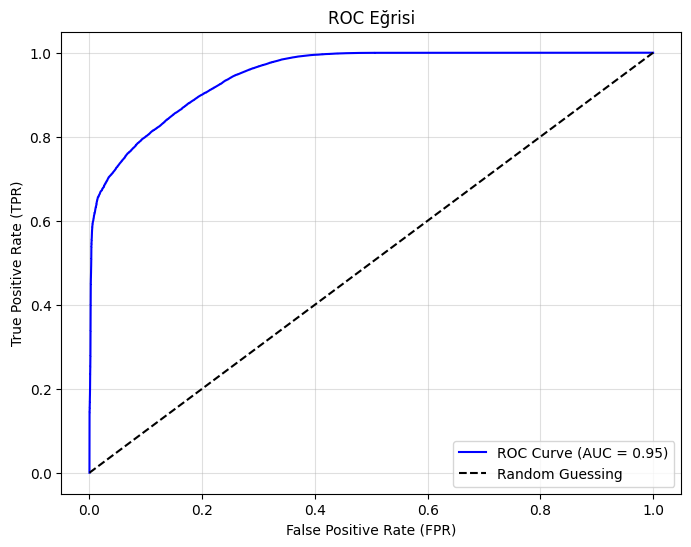

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix , roc_auc_score, roc_curve

from sklearn.preprocessing import StandardScaler #Model scaler ile daha iyi sonuç verdi

X = df.drop('Response', axis=1)
y = df['Response']

categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

scaler = StandardScaler()
X[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Region_Code']] = scaler.fit_transform(X[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Region_Code']])

#SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Eğitim seti boyutu (SMOTE sonrası):", X_resampled.shape)

catboost_model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.01, random_state=42, verbose=0) #modelin parametre ayarlamaları

catboost_model.fit(X_train, y_train, cat_features=categorical_features)
y_pred_test = catboost_model.predict(X_test)

#iki metrik bakıyoruz birincisi F1-Score
print("CatBoost - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("CatBoost - Classification Report:\n", classification_report(y_test, y_pred_test))

# ikinci metrik ROC-AUC
y_prob = catboost_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıkları
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Skoru:", roc_auc)

# ROC eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("ROC Eğrisi")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

Overfitting Kontrolü

In [ ]:
#Model ezber yapmışmı diye kfold cv bakıyorum

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

roc_auc = make_scorer(roc_auc_score, needs_proba=True)
cv_roc_auc_scores = cross_val_score(catboost_model, X_resampled, y_resampled, cv=5, scoring=roc_auc)

print(f"Cross-Validation ROC-AUC Skorları: {cv_roc_auc_scores}")
print(f"Cross-Validation Ortalama ROC-AUC Skoru: {cv_roc_auc_scores.mean():.4f}")
print(f"Cross-Validation Standart Sapması: {cv_roc_auc_scores.std():.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


0:	learn: 0.6805184	total: 21.4ms	remaining: 10.7s
100:	learn: 0.3962959	total: 2.02s	remaining: 7.99s
200:	learn: 0.3474716	total: 4.07s	remaining: 6.05s
300:	learn: 0.3204903	total: 6s	remaining: 3.97s
400:	learn: 0.2978196	total: 7.99s	remaining: 1.97s
499:	learn: 0.2759425	total: 9.97s	remaining: 0us
0:	learn: 0.6816983	total: 21.2ms	remaining: 10.6s
100:	learn: 0.4096462	total: 2.02s	remaining: 7.98s
200:	learn: 0.3683474	total: 4.03s	remaining: 6s
300:	learn: 0.3493363	total: 5.94s	remaining: 3.93s
400:	learn: 0.3291855	total: 7.9s	remaining: 1.95s
499:	learn: 0.3181804	total: 9.86s	remaining: 0us
0:	learn: 0.6816448	total: 21.6ms	remaining: 10.8s
100:	learn: 0.4100995	total: 2.05s	remaining: 8.09s
200:	learn: 0.3715633	total: 4.09s	remaining: 6.09s
300:	learn: 0.3509564	total: 5.99s	remaining: 3.96s
400:	learn: 0.3323767	total: 7.93s	remaining: 1.96s
499:	learn: 0.3185918	total: 9.85s	remaining: 0us
0:	learn: 0.6816875	total: 21ms	remaining: 10.5s
100:	learn: 0.4106290	total: 2.

StratifiedKFold

In [ ]:
#sonuç istediğim gibi gelmedi muhtemelen ilk bölümde verilerin dağılımı kötü bu yüzden StratifiedKFold bakalım

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Stratified K-Fold kullanımı
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(catboost_model, X_resampled, y_resampled, cv=skf, scoring="accuracy")
print(f"Stratified Cross-Validation Skorları: {cv_scores}")
print(f"Ortalama Doğruluk: {cv_scores.mean():.4f}")


0:	learn: 0.6814257	total: 20.8ms	remaining: 10.4s
100:	learn: 0.4085802	total: 2s	remaining: 7.89s
200:	learn: 0.3674364	total: 3.98s	remaining: 5.92s
300:	learn: 0.3460348	total: 5.9s	remaining: 3.9s
400:	learn: 0.3273683	total: 7.87s	remaining: 1.94s
499:	learn: 0.3096626	total: 9.86s	remaining: 0us
0:	learn: 0.6814253	total: 21.4ms	remaining: 10.7s
100:	learn: 0.4088126	total: 2.03s	remaining: 8s
200:	learn: 0.3677596	total: 4.02s	remaining: 5.98s
300:	learn: 0.3459063	total: 5.95s	remaining: 3.94s
400:	learn: 0.3282689	total: 7.89s	remaining: 1.95s
499:	learn: 0.3142729	total: 9.85s	remaining: 0us
0:	learn: 0.6815129	total: 20.9ms	remaining: 10.4s
100:	learn: 0.4086295	total: 2.06s	remaining: 8.15s
200:	learn: 0.3676982	total: 4.08s	remaining: 6.07s
300:	learn: 0.3459543	total: 5.99s	remaining: 3.96s
400:	learn: 0.3264728	total: 7.94s	remaining: 1.96s
499:	learn: 0.3112299	total: 9.88s	remaining: 0us
0:	learn: 0.6815086	total: 21.7ms	remaining: 10.8s
100:	learn: 0.4081782	total: 2

In [ ]:
response_counts = df['Response'].value_counts()
print(response_counts)

Response
0    334399
1     46710
Name: count, dtype: int64


Öğrenme Eğrisi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2410, in _fit


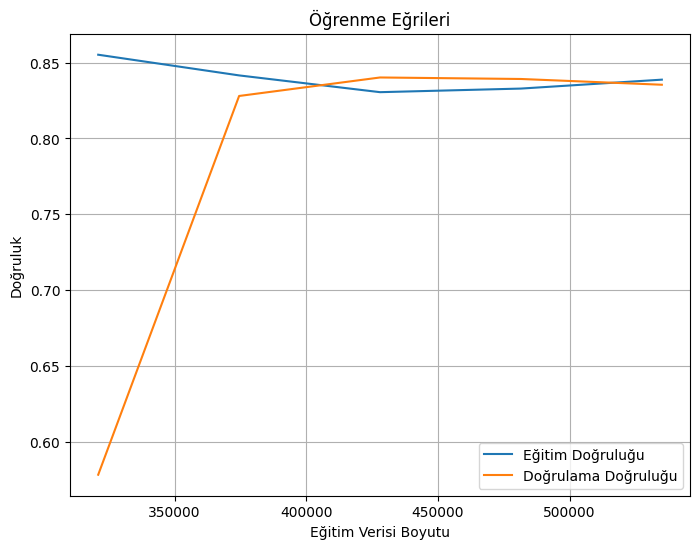

In [ ]:

#Overfitting kontrolü için bakabileceğimiz diğer yöntem Öğrenme Eğrisidir iki eğri birbirine yakın olmalı data artarken doğruluk azalıyorsa
# model ezber yapıyor demektir.

from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(
    catboost_model, X_resampled, y_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
)

train_means = train_scores.mean(axis=1)
valid_means = valid_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_means, label="Eğitim Doğruluğu")
plt.plot(train_sizes, valid_means, label="Doğrulama Doğruluğu")
plt.title("Öğrenme Eğrileri")
plt.xlabel("Eğitim Verisi Boyutu")
plt.ylabel("Doğruluk")
plt.legend()
plt.grid()
plt.show()


# Modeli Kaydetme



In [ ]:
import joblib

#Son olarak modeli kaydedelim
joblib.dump(catboost_model, "catboost_model.pkl")

# Modelde kullanılan özelliklerin sırasını kaydet
model_features = X.columns.tolist()
joblib.dump(model_features, "model_features.pkl")

print("Model ve özellikler başarıyla kaydedildi!")


Model ve özellikler başarıyla kaydedildi!
